In [9]:
# Note to presentation mode: run the first two cells before presenting.
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier
pd.set_option('display.mpl_style', 'default') 
plt.rcParams['figure.figsize'] = (18, 5)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
%%HTML
<!-- Not content, but for better presentation styles -->
<style>
.rise-enabled .rendered_html table.dataframe {
    font-size: 16px;
}
.rendered_html code {
    background: #EFEFEF;
    border: 1px solid #CCC;
    padding: 1px 5px;
    border-radius: 1px;
}
.rise-enabled .fa-times-circle:before,
.rise-enabled .fa-question:before,
.rise-enabled aside.controls {
    opacity: 0.1;
}
.rise-enabled a,
.rise-enabled a:active,
.rise-enabled a:hover,
.rise-enabled a:visited,
.rise-enabled :link {
    text-decoration: none;
    color: #A68910;
}
</style>

# Messy Sensor Data:
## A Programmer's Cleaning Guide
* * *
*@Xavier_Ho*, #pyconau

<small>*Feel free to tag me on Twitter for questions and comments.*</small>

# Related #pyconau talks

This talk is a tutorial (thanks @evildmp!) for cleaning up messy data with `pandas`. You might also find these other ones useful:

 * [**Using Python in a Data Hackathon**](https://www.youtube.com/watch?v=Ck1Ns6D3rZc&list=PLs4CJRBY5F1KsK4AbFaPsUT8X8iXc7X84&index=21) - Tennessee Leeuwenburg
 * [**Visualising data with Python**](https://www.youtube.com/watch?v=6d3Yk7a2qYI&list=PLs4CJRBY5F1KsK4AbFaPsUT8X8iXc7X84&index=35) - Clare Sloggett

Slides will be available online.
 
There will be time for questions at the end - happy to navigate specific problems you may have.

# Motivation: healthy water

* Aquatic microorganisms thrive and die with seasonal temperatures.

* Cyanobacteria, or "blue-green algae", produces oxygen in water.

* Too much cyanobacteria in water is harmful to consume.

* We model cyanobacteria in water with weather data.

*In short: we can predict and track cyanobacteria, and keep our water healthy.*

# Let's take a look at our weather sensor data...

In this talk, we use `pandas` for data wrangling.

You can install it with your favourite package manager ([instructions](http://pandas.pydata.org/pandas-docs/stable/install.html)).

```$ conda install pandas```



To begin:
 * `pandas.read_csv()`: Opens a CSV file as a **DataFrame**, like a table.
 * `DataFrame.head()`: Displays the first 5 entries.

# Read a CSV file

In [11]:
import pandas as pd

# Open a comma-separated values (CSV) file as a DataFrame
weather_observations = pd.read_csv('observations/Canberra_observations.csv')

# Print the first 5 entries
weather_observations.head()

,Date Time Wind dir Wind spd Wind gust Tmp Dew pt Feels like rh Fire Rain Rain 10' Pres
0,01/01/2013\tWed 00:00 EDT\tWNW\t9\t9\t19.6\t0....
1,01/01/2013\tTue 23:30 EDT\tWNW\t-\t13\t20.7\t0...
2,01/01/2013\tTue 23:00 EDT\tW\t9\t11\t22.8\t0.9...
3,01/01/2013\tTue 22:30 EDT\tWNW\t11\t13\t22.6\t...
4,01/01/2013\tTue 22:00 EDT\tWNW\t15\t19\t23.9\t...


The file seems to be tab seperated. There are dates, and some empty items. 

# Can we read it more clearly?

[`pandas.read_csv()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html?highlight=read_csv#pandas.read_csv) is very versatile with keyword arguments.

 * `sep`: The separator between columns.

 * `parse_dates`: Treat one or more columns like dates.
 * `dayfirst`: Use DD.MM.YYYY format, not month first.
 * `infer_datetime_format`: Tell pandas to guess the date format.

 * `na_values`: Specify values to be treated as empty.

# Read a CSV file the 🐼🐼 way

In [12]:
# Supply pandas with some hints about the file to read
weather_observations = pd.read_csv('observations/Canberra_observations.csv',
#                                    sep='\t',
#                                    parse_dates={'Datetime': ['Date', 'Time']},
#                                    dayfirst=True,
#                                    infer_datetime_format=True,
#                                    na_values=['-'],
                                  )
# Display some entries
weather_observations.head()

,Date Time Wind dir Wind spd Wind gust Tmp Dew pt Feels like rh Fire Rain Rain 10' Pres
0,01/01/2013\tWed 00:00 EDT\tWNW\t9\t9\t19.6\t0....
1,01/01/2013\tTue 23:30 EDT\tWNW\t-\t13\t20.7\t0...
2,01/01/2013\tTue 23:00 EDT\tW\t9\t11\t22.8\t0.9...
3,01/01/2013\tTue 22:30 EDT\tWNW\t11\t13\t22.6\t...
4,01/01/2013\tTue 22:00 EDT\tWNW\t15\t19\t23.9\t...


Note: `NaN` in the table above means **empty**, *not the floating-point number value*.

In [13]:
# For consistency between slides
weather_observations = pd.read_csv('observations/Canberra_observations.csv',
                                   sep='\t',
                                   parse_dates={'Datetime': ['Date', 'Time']},
                                   dayfirst=True,
                                   infer_datetime_format=True,
                                   na_values=['-']
                                  )

# Small steps in data cleaning

The data seems complete, but still has some issues:

* Each day includes midnight, and another midnight next day.
* Order starts at end of day and goes backwards in time.

`pandas` offers some functions to help us out:
 * `DataFrame.drop_duplicates()`: Delete duplicated items.
 * `DataFrame.sort_values()`: Rearrange in order.
 * `DataFrame.set_index()`: Specify a column to use as index.

# Keep order in our data

In [14]:
# Remove duplicated items with the same date and time
no_duplicates = weather_observations.drop_duplicates('Datetime', keep='last')

# Sorting is ascending by default, or chronological order
# sorted_dataframe = no_duplicates.sort_values('Datetime')

# Use `Datetime` as our DataFrame index
# indexed_weather_observations = sorted_dataframe.set_index('Datetime')

# Display some entries
no_duplicates.head()

,Datetime,Wind dir,Wind spd,Wind gust,Tmp,Dew pt,Feels like,rh,Fire,Rain,Rain 10',Pres
1,2013-01-01 23:30:00,WNW,NaN,13.0,20.7,0.7,20.7,26.0,13.0,0.0,0.0,1011.1
2,2013-01-01 23:00:00,W,9.0,11.0,22.8,0.9,22.8,23.0,15.0,0.0,0.0,1011.0
3,2013-01-01 22:30:00,WNW,11.0,13.0,22.6,-1.0,22.6,21.0,17.0,0.0,0.0,1011.0
4,2013-01-01 22:00:00,WNW,15.0,19.0,23.9,-2.2,23.9,18.0,21.0,0.0,0.0,1011.1
5,2013-01-01 21:30:00,W,13.0,17.0,24.0,-2.0,24.0,18.0,20.0,0.0,0.0,1011.0


In [15]:
# For consistency
no_duplicates = weather_observations.drop_duplicates('Datetime', keep='last')
sorted_dataframe = no_duplicates.sort_values('Datetime')
indexed_weather_observations = sorted_dataframe.set_index('Datetime')

# Let wind be numbers

To process wind direction, we need them in numbers.
 * North wind (↓) is 0 degrees, going clockwise ⟳.
 * East wind (←) is 90 degrees.

We need to transform each direction label "N", "NNE", "NE", "ENE", "E", etc., to numbers on the column.

`Series.apply()`: Transforms each entry with a function.

# Transforming DataFrames

In [16]:
# Translate wind direction to degrees
wind_directions = {
     'N':   0. , 'NNE':  22.5, 'NE':  45. , 'ENE':  67.5 ,
     'E':  90. , 'ESE': 112.5, 'SE': 135. , 'SSE': 157.5 ,
     'S': 180. , 'SSW': 202.5, 'SW': 225. , 'WSW': 247.5 ,
     'W': 270. , 'WNW': 292.5, 'NW': 315. , 'NNW': 337.5 }

In [17]:
# Replace wind directions column with a new number column
# `get()` accesses values safely from dictionary
indexed_weather_observations['Wind dir'] = \
    indexed_weather_observations['Wind dir'].apply(wind_directions.get)
    
# Display some entries
indexed_weather_observations.head()

,Wind dir,Wind spd,Wind gust,Tmp,Dew pt,Feels like,rh,Fire,Rain,Rain 10',Pres
Datetime,,,,,,,,,,,
2013-01-01 00:00:00,67.5,2.0,6.0,15.9,3.7,15.9,44.0,5.0,0.0,0.0,1014.1
2013-01-01 00:30:00,NaN,0.0,0.0,14.5,4.7,14.5,52.0,3.0,0.0,0.0,1014.0
2013-01-01 01:00:00,NaN,0.0,0.0,12.8,4.6,12.8,57.0,3.0,0.0,0.0,1013.5
2013-01-01 01:30:00,202.5,6.0,9.0,13.3,5.9,13.3,61.0,3.0,0.0,0.0,1013.4
2013-01-01 02:00:00,225.0,2.0,7.0,12.5,4.7,12.5,59.0,3.0,0.0,0.0,1013.2


# Irregular data frequency

Our data has odd timestamps from time to time, For example:

In [18]:
# One section where the data has weird timestamps ...
indexed_weather_observations[1800:1806]

,Wind dir,Wind spd,Wind gust,Tmp,Dew pt,Feels like,rh,Fire,Rain,Rain 10',Pres
Datetime,,,,,,,,,,,
2013-02-04 00:30:00,67.5,9.0,15.0,15.1,12.6,15.1,85.0,1.0,0.0,0.0,1020.2
2013-02-04 00:33:00,67.5,7.0,11.0,15.0,12.7,15.0,86.0,1.0,0.0,0.0,1020.2
2013-02-04 01:00:00,67.5,6.0,9.0,14.9,12.8,14.9,87.0,1.0,0.0,0.0,1020.2
2013-02-04 01:11:00,45.0,4.0,7.0,15.0,12.9,15.0,87.0,1.0,0.0,0.0,1020.1
2013-02-04 01:30:00,67.5,6.0,7.0,15.4,12.9,15.4,85.0,1.0,0.0,0.0,1020.0
2013-02-04 02:00:00,NaN,0.0,0.0,14.7,13.1,14.7,90.0,1.0,0.0,0.0,1019.9


We can solve this. [`DataFrame.asfreq()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.asfreq.html?highlight=asfreq#pandas.DataFrame.asfreq) forces a specific frequency on the index, discarding and filling the rest.

# Setting data frequency

Let's set each data point to be every 30 minutes.

In [19]:
# Force the index to be every 30 minutes
regular_observations = indexed_weather_observations.asfreq('30min')
    
# Same section at different indices since setting its frequency :)
regular_observations[1633:1638]

,Wind dir,Wind spd,Wind gust,Tmp,Dew pt,Feels like,rh,Fire,Rain,Rain 10',Pres
Datetime,,,,,,,,,,,
2013-02-04 00:30:00,67.5,9.0,15.0,15.1,12.6,15.1,85.0,1.0,0.0,0.0,1020.2
2013-02-04 01:00:00,67.5,6.0,9.0,14.9,12.8,14.9,87.0,1.0,0.0,0.0,1020.2
2013-02-04 01:30:00,67.5,6.0,7.0,15.4,12.9,15.4,85.0,1.0,0.0,0.0,1020.0
2013-02-04 02:00:00,NaN,0.0,0.0,14.7,13.1,14.7,90.0,1.0,0.0,0.0,1019.9
2013-02-04 02:30:00,NaN,0.0,0.0,14.6,13.0,14.6,90.0,1.0,0.0,0.0,1019.9


# Plotting some data for a better picture

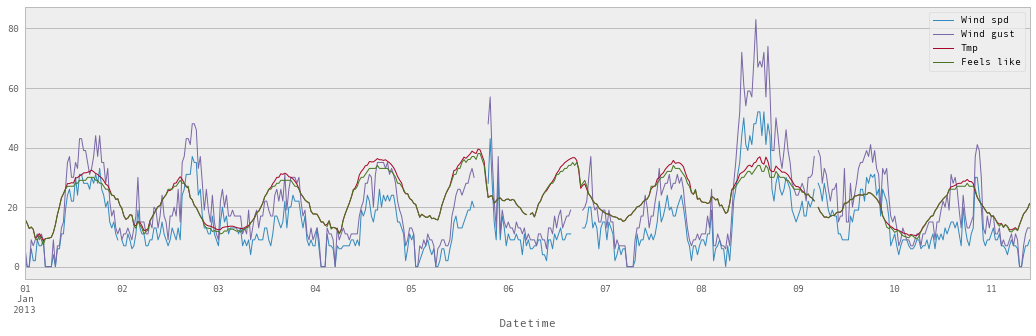

In [20]:
# Plot the first 500 entries with selected columns
regular_observations[['Wind spd', 'Wind gust', 'Tmp', 'Feels like']][:500].plot()

There seems to be gaps in our dataset between 4th Jan and 9th Jan.

# Gaps in the data

Weather sensors sometimes drop out. 

But for modelling purposes, we need a gap-free dataset.

`Series.interpolate()`: Fill in empty values based on index. 

# Interpolate and fill empty rows

In [21]:
# Interpolate data to fill empty values
for column in regular_observations.columns:
    regular_observations[column].interpolate('time', inplace=True)

# Display some interpolated entries    
regular_observations[1633:1638]

,Wind dir,Wind spd,Wind gust,Tmp,Dew pt,Feels like,rh,Fire,Rain,Rain 10',Pres
Datetime,,,,,,,,,,,
2013-02-04 00:30:00,67.5,9.0,15.0,15.1,12.6,15.1,85.0,1.0,0.0,0.0,1020.2
2013-02-04 01:00:00,67.5,6.0,9.0,14.9,12.8,14.9,87.0,1.0,0.0,0.0,1020.2
2013-02-04 01:30:00,67.5,6.0,7.0,15.4,12.9,15.4,85.0,1.0,0.0,0.0,1020.0
2013-02-04 02:00:00,67.5,0.0,0.0,14.7,13.1,14.7,90.0,1.0,0.0,0.0,1019.9
2013-02-04 02:30:00,67.5,0.0,0.0,14.6,13.0,14.6,90.0,1.0,0.0,0.0,1019.9


# Plotting to be sure!

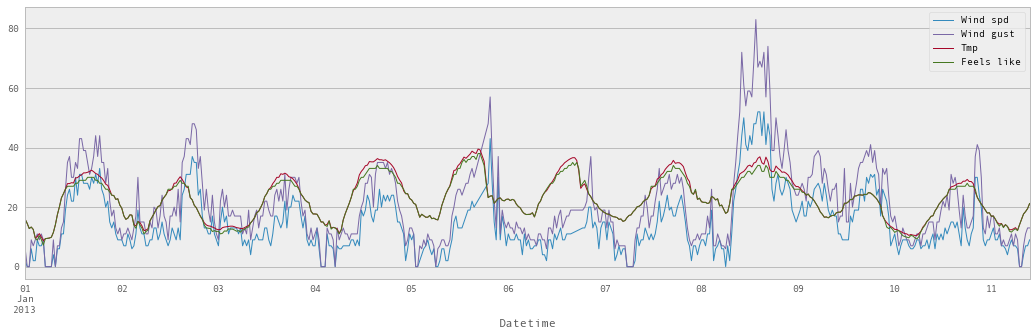

In [22]:
# Plot it again - gap free!
regular_observations[['Wind spd', 'Wind gust', 'Tmp', 'Feels like']][:500].plot()

Now the dataset is ready to be used for modelling! 🎉

# You too can keep our water healthy 🐹 

Today you learned how to use `pandas` to in many ways:

 * Reading a CSV file with proper structures
 * Sorting your dataset
 * Transforming columns by applying a function
 * Regulate data frequency from odd ones
 * Interpolate and fill missing data
 * Plotting your dataset

`pandas` is much more powerful than what we covered today. [Check out the documentation](http://pandas.pydata.org/pandas-docs/stable/index.html)! You might find some gems.

### Messy Sensor Data: A Programmer's Cleaning Guide

Slides available at [github.com/Spaxe/pyconau2017-messy-sensor-data](https://github.com/Spaxe/pyconau2017-messy-sensor-data)

There is a bonus section on combining two DataFrames with different frequencies in the notebook.

🐹 Let's be friends on Twitter: [@Xavier_Ho](https://twitter.com/Xavier_Ho)

In [23]:
# BONUS SECTION
# Similarly, for sky observations
sky_observations = pd.read_csv('observations/Canberra_sky.csv',
                                   sep='\t',
                                   parse_dates={'Datetime': ['Date', 'Time']},
                                   dayfirst=True,
                                   infer_datetime_format=True,
                                   na_values=['-', 'obscured'])
sky_observations.head()

,Datetime,Vis,Cloud,Current weather,Past weather,?
0,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1,2013-01-01 23:00:00,NaN,NaN,NaN,NaN,NaN
2,2013-01-01 21:00:00,NaN,NaN,NaN,NaN,NaN
3,2013-01-01 20:00:00,NaN,NaN,NaN,NaN,NaN
4,2013-01-01 18:00:00,NaN,NaN,NaN,NaN,NaN


In [24]:
# As before, remove duplicates and set index to datetime.
sky_observations.drop_duplicates('Datetime', keep='last', inplace=True)
sky_observations.sort_values('Datetime', inplace=True)
sky_observations.set_index('Datetime', inplace=True)

sky_observations.head()

,Vis,Cloud,Current weather,Past weather,?
Datetime,,,,,
2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2013-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN
2013-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
2013-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN
2013-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN


In [25]:
# Drop rows that have no data
sky_observations.dropna(how='all', inplace=True)

sky_observations.head()

,Vis,Cloud,Current weather,Past weather,?
Datetime,,,,,
2013-01-03 03:00:00,NaN,8/8,NaN,NaN,NaN
2013-01-03 06:00:00,NaN,8/8,NaN,NaN,NaN
2013-01-03 09:00:00,NaN,1/8,NaN,NaN,NaN
2013-01-05 09:00:00,25000.0,clear,NaN,NaN,NaN
2013-01-05 18:00:00,NaN,4/8,NaN,NaN,NaN


In [26]:
# Display the inferred data types
sky_observations.dtypes

Vis                float64
Cloud               object
Current weather    float64
Past weather       float64
?                  float64
dtype: object

In [27]:
# What are the values in the 'Cloud' column?
sky_observations['Cloud'].unique()

array(['8/8', '1/8', 'clear', '4/8', '6/8', '3/8', '7/8', nan, '2/8', '5/8'], dtype=object)

In [28]:
# 'obscured' means that the visibility was too low to see clouds. We will consider it to be NaN.

# Define a function to Change the 'Cloud' column to numerical values
def cloud_to_numeric(s):
    if s == 'clear' or pd.isnull(s):
        return 0
    else: 
        return int(s[0]) / 8.0

# Apply the function to every item and assign it back to the original dataframe
sky_observations['Cloud'] = \
    sky_observations['Cloud'].apply(cloud_to_numeric, convert_dtype=False).astype('float64')
sky_observations.head()

,Vis,Cloud,Current weather,Past weather,?
Datetime,,,,,
2013-01-03 03:00:00,NaN,1.000,NaN,NaN,NaN
2013-01-03 06:00:00,NaN,1.000,NaN,NaN,NaN
2013-01-03 09:00:00,NaN,0.125,NaN,NaN,NaN
2013-01-05 09:00:00,25000.0,0.000,NaN,NaN,NaN
2013-01-05 18:00:00,NaN,0.500,NaN,NaN,NaN


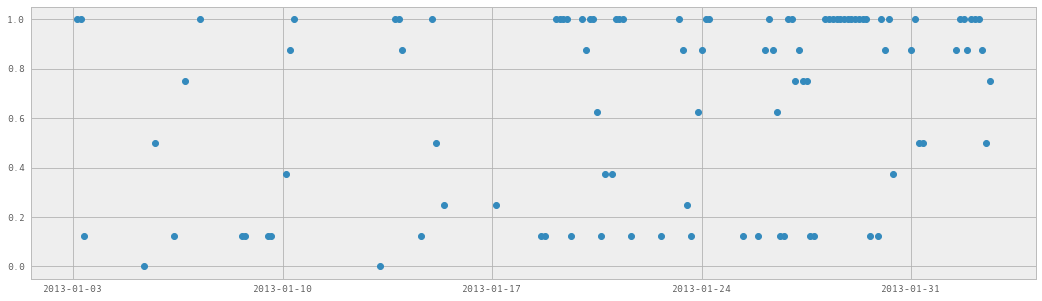

In [29]:
# Plot the cloud cover with scatter plot using matplotlib
clouds = sky_observations[['Cloud']][:100]
plt.plot_date(clouds.index, clouds.values)

In [30]:
# Join the two observations together
combined_observations = regular_observations.combine_first(sky_observations[['Cloud']])
combined_observations.head()

,Cloud,Dew pt,Feels like,Fire,Pres,Rain,Rain 10',Tmp,Wind dir,Wind gust,Wind spd,rh
Datetime,,,,,,,,,,,,
2013-01-01 00:00:00,NaN,3.7,15.9,5.0,1014.1,0.0,0.0,15.9,67.5,6.0,2.0,44.0
2013-01-01 00:30:00,NaN,4.7,14.5,3.0,1014.0,0.0,0.0,14.5,112.5,0.0,0.0,52.0
2013-01-01 01:00:00,NaN,4.6,12.8,3.0,1013.5,0.0,0.0,12.8,157.5,0.0,0.0,57.0
2013-01-01 01:30:00,NaN,5.9,13.3,3.0,1013.4,0.0,0.0,13.3,202.5,9.0,6.0,61.0
2013-01-01 02:00:00,NaN,4.7,12.5,3.0,1013.2,0.0,0.0,12.5,225.0,7.0,2.0,59.0


In [ ]:
# Create a new series with 30-minutely timestamps
time_series = pd.date_range('2013-01-01', '2017-01-01', freq='30min')[:-1]
time_series

In [ ]:
# Reindex our dataset
indexed_observations = combined_observations.reindex(time_series)
indexed_observations

In [ ]:
# Display the columns in the dataset
indexed_observations.columns

In [ ]:
# Interpolate data to fill NaN
for column in indexed_observations.columns:
    indexed_observations[column].interpolate('time', inplace=True, limit_direction='both')

# Preview the cleaned data    
indexed_observations

In [ ]:
# Current bug in pandas fails plotting some interpolated frequencies
# see https://github.com/pandas-dev/pandas/issues/14763 (to be fixed by 31 August, 2017)

# Convert pandas DateTimeIndex to Python's datetime.datetime
timestamps = indexed_observations.index[:1000].to_pydatetime()

# Selecting a few columns to plot
selection1 = indexed_observations[['Wind spd', 'Wind gust', 'Tmp', 'Feels like']][:1000]
selection2 = indexed_observations[['Cloud']][:1000]

# For now, we copy the index and values to matplotlib
# see https://stackoverflow.com/questions/43206554/typeerror-float-argument-must-be-a-string-or-a-number-not-period/45191625#45191625
legend = plt.plot_date(timestamps, selection1.values, '-')
plt.legend(selection1.columns)
plt.show()

legend = plt.plot_date(timestamps, selection2.values, '-')
plt.legend(selection2.columns)
plt.show()